<a href="https://colab.research.google.com/github/maxwillzq/opencvRead/blob/master/Opencv_Learning_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Principal Component Analysis (PCA)

# 1. Go through the python code first

In [0]:
from __future__ import print_function
from __future__ import division
import cv2 as cv
import numpy as np
import argparse
from math import atan2, cos, sin, sqrt, pi
import matplotlib.pyplot as plt
import copy

In [0]:
#!wget https://docs.opencv.org/3.4.3/pca_test1.jpg

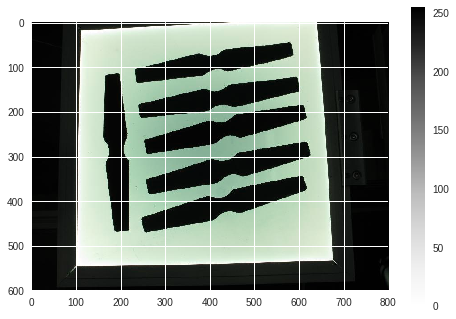

In [66]:
#read image into src
img_path = "pca_test1.jpg"
src = cv.imread(img_path)
plt.imshow(src)
plt.colorbar()


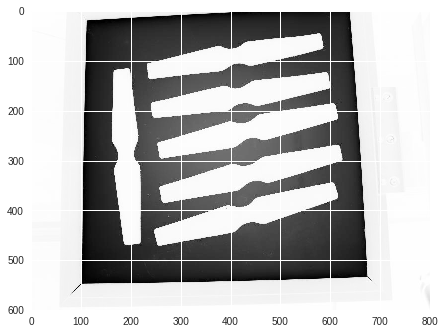

In [67]:
# Convert image to grayscale
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
plt.imshow(gray)

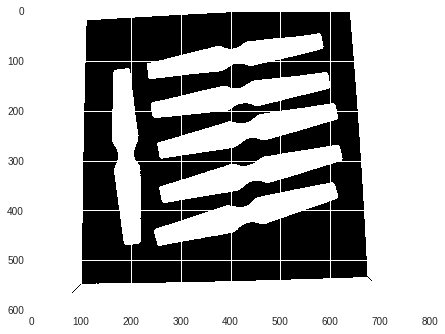

In [68]:
# Convert image to binary
_, bw = cv.threshold(gray, 50, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
plt.imshow(bw)

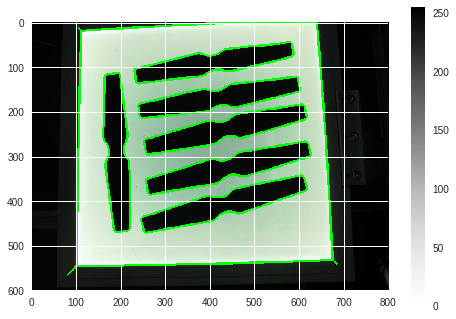

In [69]:
_, contours, _ = cv.findContours(bw, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
tmp = src
cv.drawContours(tmp, contours, -1, (0,255,0), 3)
plt.imshow(tmp)
plt.colorbar()

In [0]:
def drawAxis(img, p_, q_, colour, scale):
    p = list(p_)
    q = list(q_)
    
    angle = atan2(p[1] - q[1], p[0] - q[0]) # angle in radians
    hypotenuse = sqrt((p[1] - q[1]) * (p[1] - q[1]) + (p[0] - q[0]) * (p[0] - q[0]))
    # Here we lengthen the arrow by a factor of scale
    q[0] = p[0] - scale * hypotenuse * cos(angle)
    q[1] = p[1] - scale * hypotenuse * sin(angle)
    cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)
    # create the arrow hooks
    p[0] = q[0] + 9 * cos(angle + pi / 4)
    p[1] = q[1] + 9 * sin(angle + pi / 4)
    cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)
    p[0] = q[0] + 9 * cos(angle - pi / 4)
    p[1] = q[1] + 9 * sin(angle - pi / 4)
    cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)
    
def getOrientation(pts, img):
    
    sz = len(pts)
    data_pts = np.empty((sz, 2), dtype=np.float64)
    for i in range(data_pts.shape[0]):
        data_pts[i,0] = pts[i,0,0]
        data_pts[i,1] = pts[i,0,1]
    # Perform PCA analysis
    mean = np.empty((0))
    mean, eigenvectors, eigenvalues = cv.PCACompute2(data_pts, mean)
    # Store the center of the object
    cntr = (int(mean[0,0]), int(mean[0,1]))
    
    
    cv.circle(img, cntr, 3, (255, 0, 255), 2)
    p1 = (cntr[0] + 0.02 * eigenvectors[0,0] * eigenvalues[0,0], cntr[1] + 0.02 * eigenvectors[0,1] * eigenvalues[0,0])
    p2 = (cntr[0] - 0.02 * eigenvectors[1,0] * eigenvalues[1,0], cntr[1] - 0.02 * eigenvectors[1,1] * eigenvalues[1,0])
    drawAxis(img, cntr, p1, (0, 255, 0), 1)
    drawAxis(img, cntr, p2, (255, 255, 0), 5)
    angle = atan2(eigenvectors[0,1], eigenvectors[0,0]) # orientation in radians
    
    return angle

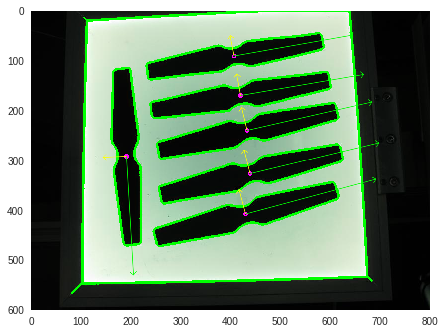

In [74]:
tmp = copy.deepcopy(src)
for i, c in enumerate(contours):
    # Calculate the area of each contour
    area = cv.contourArea(c);
    # Ignore contours that are too small or too large
    if area < 1e2 or 1e5 < area:
        continue
    # Draw each contour only for visualisation purposes
    #cv.drawContours(tmp, contours, i, (0, 0, 255), 2);
    # Find the orientation of each shape
    getOrientation(c, tmp)

plt.imshow(tmp)
plt.grid()

#  2. What is PCA

* Principal Component Analysis (PCA) is a statistical procedure that extracts the most important features of a dataset.
Assume n sample with p dimension, convert $\pmb{X}$ of dimension p to small dimension L.


* Calculate the empirical mean. Subtract the empirical mean vector u from each row of the data matrix X.

$$
\vec{u} = \frac{1}{n} \sum\vec{x_i}
$$

$$
\vec{b_i} = \vec{x_i} - \vec{u}
$$


* Find the p×p empirical covariance matrix C from the outer product of matrix B with itself
$$
\pmb{C} = \frac{1}{n - 1} \pmb{B^*}.\pmb{B}
$$

* Find the eigenvectors and eigenvalues of the covariance matrix

$$
\pmb{C} = \pmb{V}diag(\vec\lambda)\pmb{V}^T
$$







# 3. cv::PCA Class Reference for C++

The sample below is the function that takes two matrices.

1. The first function stores a set of vectors (a row per vector) that is used to calculate PCA. 
2. The second function stores another "test" set of vectors (a row per vector)
3. First, these vectors are compressed with PCA, then reconstructed back
4. then the reconstruction error norm is computed and printed for each vector. :